In [76]:
import pandas as pd
import re
import inflection

In [77]:
df = pd.read_csv(f"../dataset/train.csv")

In [ ]:
# Remover spaco da string
for i in range( len( df ) ):
  df.loc[i, 'ID'] = df.loc[i, 'ID'].strip()
  df.loc[i, 'Delivery_person_ID'] = df.loc[i, 'Delivery_person_ID'].strip()
  df.loc[i, 'Road_traffic_density'] = df.loc[i, 'Road_traffic_density'].strip()
  df.loc[i, 'Type_of_vehicle'] = df.loc[i, 'Type_of_vehicle'].strip()
  df.loc[i, 'Type_of_order'] = df.loc[i, 'Type_of_order'].strip()

In [ ]:
# Excluir as linhas com a idade dos entregadores vazia
# ( Conceitos de seleção condicional )
linhas_vazias = df['Delivery_person_Age'] != 'NaN '
df = df.loc[linhas_vazias, :]

In [ ]:
# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype( int )

In [ ]:
# Conversao de texto/categoria/strings para numeros decimais
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype( float )

In [ ]:
# Conversao de texto para data
df['Order_Date'] = pd.to_datetime( df['Order_Date'], format='%d-%m-%Y' )

In [ ]:
# Excluir as linhas com a multiplas entregasdas vazia
linhas_vazias = df['multiple_deliveries'] != 'NaN '
df = df.loc[linhas_vazias, :]

In [ ]:
# Excluir as linhas com a multiplas entregasdas vazia
df = df[df['multiple_deliveries'].notna()]

In [ ]:
# Conversao de texto/categoria/string para numeros inteiros
df['multiple_deliveries'] = df['multiple_deliveries'].astype( int )

In [ ]:
# Comando para remover o texto de números
df = df.reset_index( drop=True )
for i in range( len( df ) ):
  df.loc[i, 'Time_taken(min)'] = re.findall( r'\d+', df.loc[i, 'Time_taken(min)'] )

In [ ]:
#1. Qual o valor da informação armazenada na linha 30 e na coluna 10?
df.iloc[30, 10]

In [ ]:
 #2. Selecione as linhas 0 a 20 e as colunas 0 a 2?
 df.iloc[0:20, 0:2]

In [ ]:
#3. Seleciona as linhas 5 a 30 e a coluna "Delivery_person_Age"
df.loc[5:30, 'Delivery_person_Age']

In [ ]:
#4. Selecione as linhas 40 a 42 e as seguintes colunas: “Restaurant_latitude”, “Restaurant_longitude”, "Delivery_location_latitude”, “Delivery_location_longitude”
df.loc[40:42, ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']]

In [ ]:
#5. Qual a menor data de entrega da coluna “Order_Date” entre as linhas 0 a 50?
df.loc[0:50, 'Order_Date'].min()

In [ ]:
#6. Qual a menor data de entrega da coluna “ Time_Orderd ” entre as linhas 0 a 50?
df.loc[0:50, 'Time_Orderd'].min()

In [ ]:
#7. Quais os nomes únicos da coluna “City” entre as linhas 50 e 70?
df.loc[50:70, 'City'].unique()

In [ ]:
#8. Quais os nomes únicos da coluna “Weatherconditions” entre as linhas 0 e 10?
df.loc[0:10, 'Weatherconditions'].unique()

In [ ]:
#9. Quais os tipos de densidade de trânsito presente na coluna “Road_traffic_density ” entre as linhas 0 a 20?
df.loc[0:20, 'Road_traffic_density']

In [ ]:
#10. Qual o ID do entregador de comida mais velho entre as colunas 50 e 70?
df.loc[50:70, ['Delivery_person_ID', 'Delivery_person_Age']].sort_values(by='Delivery_person_Age', ascending=False).head(5)

In [ ]:
#11. Qual o ID do entregador de comida com a melhor avaliação de entrega entre as colunas 50 e 70?
df.loc[50:70, ['Delivery_person_ID', 'Delivery_person_Ratings']].sort_values(by='Delivery_person_Ratings', ascending=False).head(3)

In [ ]:
#12. Quais os tipos de veículos utilizados pelos entregadores entre as linhas 0 a 30?
df.loc[0:30, 'Type_of_vehicle']

In [ ]:
#13. Quais os tipos de pedidos único que foram entregues entre as colunas 100 e 120?
df.loc[100:120, 'Type_of_order'].unique()

In [ ]:
#================================================================================#

In [ ]:
#1. Qual o número total de entregadores cadastrados na base de dados?
df['Delivery_person_ID'].count()

In [ ]:
df.shape[0]

In [ ]:
#2. Qual o número total de entregadores únicos cadastrados na base de dados?
len(df['Delivery_person_ID'].unique())
df['Delivery_person_ID'].nunique()

In [ ]:
#3. Qual a idade do entregador mais velho? E do mais novo?
df['Delivery_person_Age'].min()

In [ ]:
df['Delivery_person_Age'].max()

In [ ]:
#4. Qual o ID do entregador com a maior idade? E o ID do entregaor com a menor idade?
df.loc[50:70, ['Delivery_person_ID', 'Delivery_person_Age']].sort_values(by='Delivery_person_Age', ascending=False).head(5)

In [ ]:
df.loc[50:70, ['Delivery_person_ID', 'Delivery_person_Age']].sort_values(by='Delivery_person_Age', ascending=True).head(2)

In [ ]:
#5. Quais os nomes das condições climáticas?
df['Weatherconditions'].unique()

In [ ]:
#6. Quantas entregas foram realizadas sob condições climáticas de tempestade de areia? ( Sandstorms )
df.loc[df.loc[:, 'Weatherconditions'] == 'conditions Sandstorms', 'Delivery_person_ID'].count()

In [ ]:
#7. Quais eram as condicões climáticas da data mais recente de entrega?
df.loc[:, ['Order_Date', 'Weatherconditions']].sort_values(by='Order_Date', ascending=False).head(160)

In [ ]:
#8. Quantos tipos de densidade de trânsito existem na base de dados? Quais os nomes delas?
df['Road_traffic_density'].dropna().unique()

In [ ]:
len(df['Road_traffic_density'].dropna().unique())

In [ ]:
#9. Quantas entregas foram feitas em cada condição climática?
df[['Order_Date', 'Weatherconditions']].groupby('Weatherconditions').count().sort_values(by='Order_Date', ascending=False).reset_index()

In [ ]:
#10. Quantos entregadores únicos fizeram entregas em cada condição climática?
df[['Delivery_person_ID', 'Weatherconditions']].groupby('Weatherconditions').count().sort_values(by='Delivery_person_ID', ascending=False).reset_index()

In [ ]:
#11. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
df[['Order_Date', 'Road_traffic_density']].groupby('Road_traffic_density').count().sort_values(by='Order_Date', ascending=False).reset_index()

In [ ]:
#12. Quantos entregadores únicos fizeram entregas em cada tipo de densidade de trânsito?
df[['Delivery_person_ID', 'Road_traffic_density']].groupby('Road_traffic_density').count().sort_values(by='Delivery_person_ID', ascending=False).reset_index()

In [ ]:
#13. Quantas cidades únicas existem na base? Quais são os seus nomes?
len(df['City'].unique())

In [ ]:
df['City'].unique()

In [ ]:
#14. Quantos tipos de veículos únicos existem na base?
len(df['Type_of_vehicle'].unique())

In [ ]:
#15. Qual o tipo de veículo que mais fez entregas com a condição de trânsito pesado? ( High )
df[['ID', 'Type_of_vehicle']][df['Road_traffic_density'] == 'High'].groupby('Type_of_vehicle').count().sort_values(by='ID', ascending=False).reset_index()

In [ ]:
#16. Qual o tipo de pedido mais feito durante condições climáticas de tempestade de areia?
df.loc[:, ['Type_of_order', 'Delivery_person_ID']][df['Weatherconditions'] == 'conditions Sandstorms'].groupby('Type_of_order').count().sort_values(by= 'Delivery_person_ID',ascending = False).reset_index()

In [ ]:
#17. Qual a cidade com o maior número de pedidos de Bebidas (Drinks) feito em Scooter?
df.loc[:, ['City', 'Delivery_person_ID']][(df['Type_of_vehicle'] == 'scooter') & (df['Type_of_order'] == 'Drinks')].groupby('City').count().sort_values(by='Delivery_person_ID', ascending = False).reset_index()

In [ ]:
#18. Qual o nome da cidade com o (os) entregador mais velho? E o nome da cidade com o (os) entregadores mais novos?
df[['City', 'Delivery_person_Age']].groupby('City').min().sort_values(by='Delivery_person_Age', ascending=True).reset_index()

In [ ]:
#19. Quantas entregas foram feitas durante o Festival?
len(df.loc[df['Festival'] == 'Yes '])

In [ ]:
#20. Quantas cidades únicas tiveram entregas feitas durante o Festival?
len(df.loc[:, 'City'][df['Festival'] == 'Yes '].unique())

In [ ]:
#21. Quantas entregas foram feitas durante o Festival na cidade chamada Urban ("Urban")
len(df[(df['Festival'] == 'Yes ') & (df['City'] == 'Urban ')])

In [ ]:
#==========================================================================================

**As novas perguntas de negócio** - Aula 34


In [ ]:
#1. Qual o número total de entregadores cadastrados na base de dados?
#Contar a quantidade de entregadores

In [ ]:
df['Delivery_person_ID'].count()

In [ ]:
#2. Qual o número total de entregadores únicos cadastrados na base de dados?
#Contar a quantidade total de entregadores que não se repetem

In [ ]:
df['Delivery_person_ID'].nunique()

In [ ]:
#2. Qual a média de idade dos entregadores por cidade?
#Calcular a média de idade dos entregadores separado por cidades

In [ ]:
df[['Delivery_person_Age', 'City']].groupby('City').mean().sort_values(by='Delivery_person_Age', ascending=False).reset_index()

In [ ]:
#3. Qual a mediana de idade dos entregadores por cidade?
#Calcular a mediana da idade dos entregadores separado por cidade

In [ ]:
df[['Delivery_person_Age', 'City']].groupby('City').median().sort_values(by='Delivery_person_Age', ascending=False).reset_index()

In [ ]:
#4. Qual o número total de entregas feitas por densidade de tráfego?
#Contar a quantidade de entregas separadas por densidades de tráfego

In [ ]:
df[['ID', 'Road_traffic_density']].groupby('Road_traffic_density').count().sort_values(by='ID', ascending=False).reset_index()

In [ ]:
#5. Qual a média das avaliações das entregas feitas por densidade de tráfego?
#Calcular a média das avaliações das entregas separadas por densidade de tráfego

In [ ]:
df[['Delivery_person_Ratings', 'Road_traffic_density']].groupby('Road_traffic_density').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

In [ ]:
#6. Qual a quantidade de entregas feitas por cidade?
#Contar a quantidade de entregas separadas por cidades

In [ ]:
df[['ID', 'City']].groupby('City').count().sort_values(by='ID', ascending=False).reset_index()

In [ ]:
#8. Qual a primeira data de entrega por cada cidade?
#Ordenar as datas de entrega por cidade e selecionar a menor data

In [ ]:
df[['Order_Date', 'City']].groupby(['City']).min().sort_values(by='Order_Date').reset_index()

In [ ]:
#9. Qual a última data de entrega por cada cidade?
##Ordenar as datas de entrega por cidade e selecionar a maior data

In [ ]:
df[['Order_Date', 'City']].groupby(['City']).max().sort_values(by='Order_Date').reset_index()

In [ ]:
#10. Qual a média de avaliações das entregas feitas por condições climáticas?
#Calcular a média de avaliações das entregas separadas por condições climaticas

In [ ]:
df[['Delivery_person_Ratings', 'Weatherconditions']].groupby('Weatherconditions').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

In [ ]:
#11. Qual o valor da avaliação mais baixa feita por tipo de condição climática e por densidade de tráfego?
#Separar dados por tipo de condição climática e por densidade de tráfego e encontrar o menor valor de avaliação de cada grupo

In [ ]:
df[['Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density']].groupby(['Weatherconditions', 'Road_traffic_density']).min().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

In [ ]:
#12. Qual a média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos?
#Calcular a média, mediana e desvio padrão das avaliações, separadas por tipo de veículos

In [ ]:
df[['Delivery_person_Ratings', 'Type_of_vehicle']].groupby('Type_of_vehicle').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

In [ ]:
#13. Quantas entreagas foram feitas no Festival?
#Contar entregas feitas em festivais

In [ ]:
len(df[df['Festival'] == 'Yes '])

In [ ]:
#14. Qual a avaliação média das entregas feitas no Festival?
#Calcular a média das avaliações das entregas feitas no Festival

In [ ]:
round(df['Delivery_person_Ratings'][df['Festival'] == 'Yes '].mean(), 2)

In [ ]:
#15. Qual a menor avaliação feita em uma entrega no Festival e por cidade?
#Separar dados que tiveram entregas no festival, agrupar por cidades e apresentar o menor valor de cada cidade

In [ ]:
df[['Delivery_person_Ratings', 'City']][df['Festival'] == 'Yes '].groupby('City').min().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

In [ ]:
#16. Qual a maior avaliação feita por tipo de pedido?
#Agrupar os tipos de pedidos e apresentar a maior avaliação

In [ ]:
df[['Delivery_person_Ratings', 'Type_of_order']].groupby('Type_of_order').max().reset_index()

In [ ]:
#17. Qual a idade do entregador mais velho da planilha de dados?
#Ordenar decrescentemente as idades por e demonstrar  mais velho

In [ ]:
df['Delivery_person_Age'].max()

In [ ]:
#18. Qual a idade do entregador mais novo da planilha de dados?
#Ordenar crescentemente as idades por e demonstrar  mais novo

In [ ]:
df['Delivery_person_Age'].min()

In [ ]:
#19. Quantas entregas foram feitas em cada condição climática?
#contar as entregas agrupadas com condições climáticas

In [ ]:
df[['ID', 'Weatherconditions']].groupby('Weatherconditions').count().sort_values(by='ID', ascending=False).reset_index()

In [ ]:
#20. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
#Contar as entregas agrupado por densidade de transito

In [ ]:
df[['Road_traffic_density', 'ID']].groupby('Road_traffic_density').count().sort_values(by='ID', ascending=False).reset_index()

# Perguntas de Negócio - Ciclo 05 | Transformação

---



##Importação de bibliotecas

In [204]:
import pandas as pd
import re
import plotly.express as px
import folium

##Leitura de Arquivo

In [232]:
#df = pd.read_csv('/content/train.csv')
df = pd.read_csv('train.csv')

##Tratamento de Dados

In [233]:
# Excluir as linhas com a multiplas entregasdas vazia
linhas_vazias = df['multiple_deliveries'] != 'NaN '
df = df.loc[linhas_vazias, :]

# Excluir as linhas com a densidade de tráfego vazia
df = df[df['Road_traffic_density'] != 'NaN ']

# Excluir as linhas com a densidade de tráfego vazia
df = df[df['City'] != 'NaN ']

# Excluir as linhas com a multiplas entregasdas vazia
df = df[df['multiple_deliveries'].notna()]

# Excluir as linhas com a idade dos entregadores vazia
# ( Conceitos de seleção condicional )
linhas_vazias = df['Delivery_person_Age'] != 'NaN '
df = df.loc[linhas_vazias, :]

# Comando para remover o texto de números
df = df.reset_index( drop=True )

#for i in range( len( df ) ):
  #df.loc[i, 'Time_taken(min)'] = re.findall( r'\d+', df.loc[i, 'Time_taken(min)'] )

# Conversao de texto/categoria/strings para numeros decimais
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype( float )

# Conversao de texto para data
df['Order_Date'] = pd.to_datetime( df['Order_Date'], format='%d-%m-%Y' )

# Remover spaco da string
for i in range( len( df ) ):
  df.loc[i, 'ID'] = df.loc[i, 'ID'].strip()
  df.loc[i, 'Delivery_person_ID'] = df.loc[i, 'Delivery_person_ID'].strip()
  df.loc[i, 'Road_traffic_density'] = df.loc[i, 'Road_traffic_density'].strip()
  df.loc[i, 'Type_of_vehicle'] = df.loc[i, 'Type_of_vehicle'].strip()
  df.loc[i, 'Type_of_order'] = df.loc[i, 'Type_of_order'].strip()
  df.loc[i, 'City'] = df.loc[i, 'City'].strip()

# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype( int )

# Conversao de texto/categoria/string para numeros inteiros
df['multiple_deliveries'] = df['multiple_deliveries'].astype( int )

# Tratamento da coluna 'Time_taken(min)'
df = df.replace(to_replace=r'\(min\)[ ]', value='', regex=True)

In [207]:
df['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium'], dtype=object)

##Visão Empresa:

###1. Quantidade de pedidos por dia.


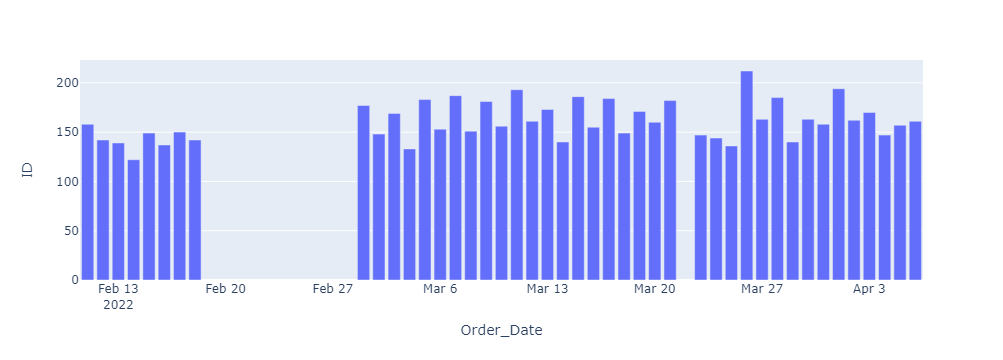

In [117]:
#Contar pedidos agrupados por dia e apresentar em um gráfico de barras

cols = ['ID', 'Order_Date']
df1 = df.loc[:, cols].groupby('Order_Date').count().reset_index()
px.bar(df1, x='Order_Date', y='ID')

###2. Quantidade de pedidos por semana.


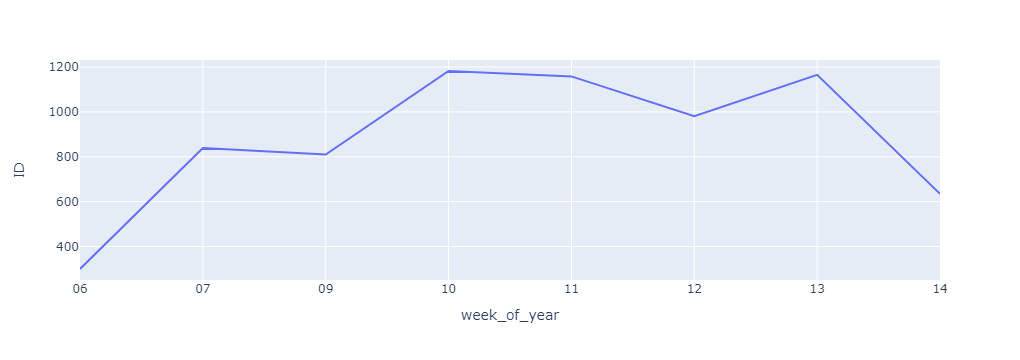

In [118]:
df['week_of_year'] = df['Order_Date'].dt.strftime('%U')
cols = ['ID', 'week_of_year']
df1 = df.loc[:, cols].groupby('week_of_year').count().reset_index()
px.line(df1, x='week_of_year', y='ID')

###3. Distribuição dos pedidos por tipo de tráfego.

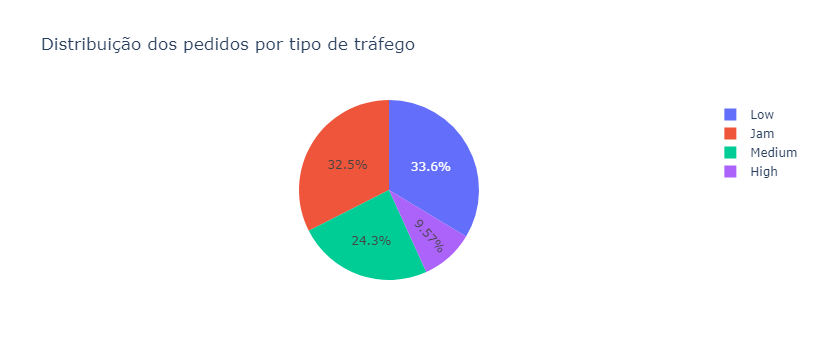

In [119]:
cols = ['ID', 'Road_traffic_density']
df.loc[:, cols].groupby('Road_traffic_density').count().reset_index()
px.pie(df, values='ID', names='Road_traffic_density', title='Distribuição dos pedidos por tipo de tráfego')

###4. Comparação do volume de pedidos por cidade e tipo de tráfego.


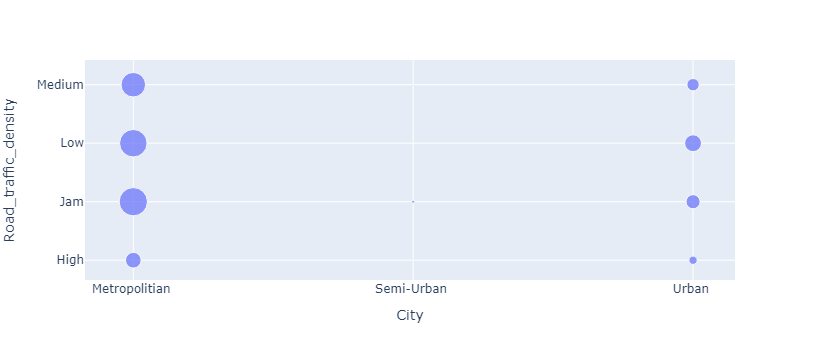

In [120]:
cols = ['ID', 'City', 'Road_traffic_density']
df_aux = df[cols].groupby(['City', 'Road_traffic_density']).count().reset_index()
px.scatter(df_aux, x='City', y='Road_traffic_density', size='ID')

###5. A quantidade de pedidos por entregador por semana.

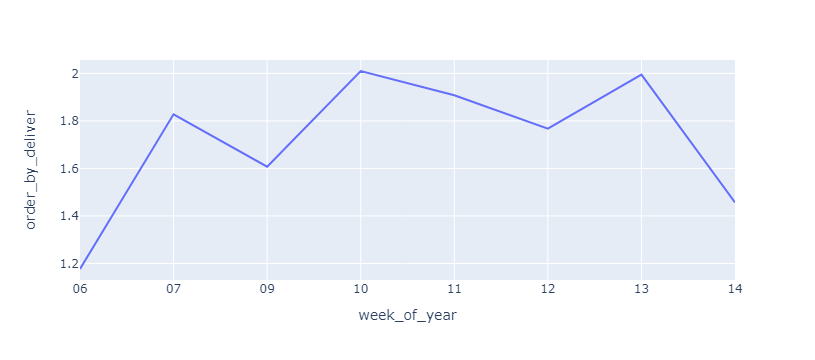

In [121]:
cols1 = ['Delivery_person_ID', 'week_of_year']
cols2 = ['ID', 'week_of_year']

#Qtd entregadores na semana
df_aux1 = df[cols1].groupby('week_of_year').nunique().reset_index()

#Pedidos na Semana
df_aux2 = df[cols2].groupby('week_of_year').count().reset_index()

#Junção de Dataframes
df_aux = pd.merge(df_aux1, df_aux2, how='inner')
df_aux['order_by_deliver'] = df_aux['ID'] / df_aux['Delivery_person_ID']

#Apresentar gráfico de linhas
px.line(df_aux, x='week_of_year', y='order_by_deliver')

###6. A localização central de cada cidade por tipo de tráfego.


In [122]:
cols = ['City', 'Road_traffic_density', 'Delivery_location_latitude', 'Delivery_location_longitude']
df_aux = df[cols].groupby(['City', 'Road_traffic_density']).median().reset_index()

#Apresenta Mapa
map = folium.Map()

for i in range(0,len(df_aux)):
   folium.Marker(
      location=[df_aux.iloc[i]['Delivery_location_latitude'],
                df_aux.iloc[i]['Delivery_location_longitude']],
      popup=df_aux.iloc[i][['City','Road_traffic_density']],
   ).add_to(map)

map

##Visão Entregadores

###1. A menor e maior idade dos entregadores.

In [123]:
df['Delivery_person_Age'].max()

39

In [124]:
df['Delivery_person_Age'].min()

20

###2. A pior e a melhor condição de veículos.


In [125]:
df['Vehicle_condition'].max()

2.0

In [126]:
df['Vehicle_condition'].min()

0.0

###3. A avaliação média por entregador.

In [127]:
df[['Delivery_person_Ratings', 'Delivery_person_ID']].groupby('Delivery_person_ID').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

,Delivery_person_ID,Delivery_person_Ratings
0,BHPRES20DEL01,5.0
1,AURGRES13DEL02,5.0
2,BHPRES17DEL01,5.0
3,KOCRES20DEL03,5.0
4,KOCRES11DEL02,5.0
...,...,...
1239,LUDHRES010DEL02,3.8
1240,BHPRES14DEL03,3.6
1241,LUDHRES20DEL01,3.6
1242,ALHRES01DEL03,3.1


###4. A avaliação média e o desvio padrão por tipo de tráfego.


In [128]:
df[['Delivery_person_Ratings', 'Road_traffic_density']].groupby('Road_traffic_density').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

,Road_traffic_density,Delivery_person_Ratings
0,High,4.662762
1,Medium,4.654301
2,Low,4.634367
3,Jam,4.594257


In [129]:
df[['Delivery_person_Ratings', 'Road_traffic_density']].groupby('Road_traffic_density').std().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

,Road_traffic_density,Delivery_person_Ratings
0,Low,0.344892
1,Jam,0.322024
2,Medium,0.279784
3,High,0.269895


###5. A avaliação média e o desvio padrão por condições climáticas.


In [130]:
df[['Delivery_person_Ratings', 'Weatherconditions']].groupby('Weatherconditions').mean().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

,Weatherconditions,Delivery_person_Ratings
0,conditions Fog,4.654232
1,conditions Sunny,4.647373
2,conditions Cloudy,4.638762
3,conditions Windy,4.622325
4,conditions Stormy,4.609504
5,conditions Sandstorms,4.601744


In [131]:
df[['Delivery_person_Ratings', 'Weatherconditions']].groupby('Weatherconditions').std().sort_values(by='Delivery_person_Ratings', ascending=False).reset_index()

,Weatherconditions,Delivery_person_Ratings
0,conditions Sunny,0.404821
1,conditions Sandstorms,0.319517
2,conditions Stormy,0.310700
3,conditions Windy,0.298194
4,conditions Cloudy,0.281638
5,conditions Fog,0.267051


In [132]:
df_aux = ( df[['Delivery_person_Ratings', 'Weatherconditions']].groupby('Weatherconditions')
            .agg( {'Delivery_person_Ratings': ['mean', 'std']}) )

df_aux.columns = ['delivery_mean', 'delivery_std']
df_aux.reset_index()

,Weatherconditions,delivery_mean,delivery_std
0,conditions Cloudy,4.638762,0.281638
1,conditions Fog,4.654232,0.267051
2,conditions Sandstorms,4.601744,0.319517
3,conditions Stormy,4.609504,0.310700
4,conditions Sunny,4.647373,0.404821
5,conditions Windy,4.622325,0.298194


###6. Os 10 entregadores mais rápidos por cidade.

In [235]:
df_aux = df[['Delivery_person_ID', 'City', 'Time_taken(min)']].groupby(['City', 'Delivery_person_ID']).mean().sort_values(by='Time_taken(min)', ascending=True).reset_index()
df_aux1 = df_aux.loc[df_aux['City'] == 'Metropolitian', :].head(10)
df_aux2 = df_aux.loc[df_aux['City'] == 'Urban', :].head(10)
df_aux3 = df_aux.loc[df_aux['City'] == 'Semi-Urban', :].head(10)

df2 = pd.concat([df_aux1, df_aux2, df_aux3]).reset_index(drop=True)
df2

,City,Delivery_person_ID,Time_taken(min)
0,Metropolitian,GOARES14DEL01,10.0
1,Metropolitian,ALHRES20DEL01,10.0
2,Metropolitian,LUDHRES03DEL03,11.0
3,Metropolitian,KNPRES03DEL02,11.0
4,Metropolitian,INDORES12DEL01,12.0
5,Metropolitian,KOLRES010DEL01,12.0
6,Metropolitian,AURGRES20DEL03,15.0
7,Metropolitian,ALHRES18DEL03,15.0
8,Metropolitian,BHPRES18DEL03,15.0
9,Metropolitian,GOARES04DEL03,15.0


In [234]:
df_aux = df[['Delivery_person_ID', 'City', 'Time_taken(min)']].groupby(['City', 'Delivery_person_ID']).mean().sort_values(by='Time_taken(min)', ascending=False).reset_index()
df_aux1 = df_aux.loc[df_aux['City'] == 'Metropolitian', :].head(10)
df_aux2 = df_aux.loc[df_aux['City'] == 'Urban', :].head(10)
df_aux3 = df_aux.loc[df_aux['City'] == 'Semi-Urban', :].head(10)

df2 = pd.concat([df_aux1, df_aux2, df_aux3]).reset_index(drop=True)
df2

,City,Delivery_person_ID,Time_taken(min)
0,Metropolitian,RANCHIRES18DEL01,248248959776636931952396946374656.0
1,Metropolitian,CHENRES14DEL02,118904296012506836341122217803776.0
2,Metropolitian,COIMBRES12DEL02,25456610835093534694428377088.0
3,Metropolitian,MYSRES02DEL02,2251656108579027142311936.0
4,Metropolitian,COIMBRES06DEL01,2172455326494564997398528.0
5,Metropolitian,CHENRES07DEL01,1557201644949248371851264.0
6,Metropolitian,VADRES19DEL02,40228258552690927206400.0
7,Metropolitian,SURRES14DEL02,31944361052767728435200.0
8,Metropolitian,MYSRES010DEL01,26153693777288734179328.0
9,Metropolitian,COIMBRES15DEL02,25362183418432811171840.0


###7. Os 10 entregadores mais lentos por cidade

In [ ]:
df_aux[['Delivery_person_ID', 'Time_Delivery']].groupby('Delivery_person_ID').mean().sort_values(by='Time_Delivery', ascending=False).reset_index().head(10)

##Visão Restaurantes:

###1. A quantidade de entregadores únicos.


In [173]:
qtd_entregadores = df['Delivery_person_ID'].nunique()

In [174]:
print('A quantidade de entregadores únicos é {}'.format(qtd_entregadores))

A quantidade de entregadores únicos é 1244


###2. A distância média dos resturantes e dos locais de entrega.


In [99]:
df['Distancia (Km)'] = df.apply(lambda x: haversine((x['Restaurant_latitude'], x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])), axis=1 )
avg_distance = df['Distancia (Km)'].mean()

In [100]:
print('A distância média das entregas é: {:.2f} Km'.format(avg_distance))

A distância média das entregas é: 30.04 Km


###3. O tempo médio e o desvio padrão de entrega por cidade.


In [219]:
cols = ['City', 'Time_taken(min)']
df_aux = df[cols].groupby('City').agg({ 'Time_taken(min)' : ['mean', 'std']})
df_aux.columns = ['avg_time', 'std_time']
df_aux.sort_values(by='avg_time', ascending=False).reset_index()

,City,avg_time,std_time
0,Metropolitian,inf,9.180317
1,Urban,inf,8.972560
2,Semi-Urban,1835001834261130733709910472354035465472497021...,2.741472


###4. O tempo médio e o desvio padrão de entrega por cidade e tipo de pedido.

In [220]:
cols = ['City', 'Time_taken(min)', 'Type_of_order']
df_aux = df[cols].groupby(['City', 'Type_of_order']).agg({ 'Time_taken(min)' : ['mean', 'std']})

df_aux.columns = ['avg_time', 'std_time']
df_aux.sort_values(by='avg_time', ascending=False).reset_index()

,City,Type_of_order,avg_time,std_time
0,Metropolitian,Buffet,inf,9.432547
1,Metropolitian,Drinks,inf,8.881716
2,Metropolitian,Meal,inf,9.077981
3,Metropolitian,Snack,inf,9.330058
4,Urban,Buffet,inf,9.013049
5,Urban,Drinks,inf,9.263237
6,Urban,Meal,inf,8.823001
7,Urban,Snack,inf,8.787438
8,Semi-Urban,Snack,55027831638831632.0,1.740051
9,Semi-Urban,Buffet,631193169188093.25,2.915476


###5. O tempo médio e o desvio padrão de entrega por cidade e tipo de tráfego.

In [161]:
cols = ['City', 'Time_taken(min)', 'Road_traffic_density']
df_aux = df[cols].groupby(['City', 'Road_traffic_density']).agg({ 'Time_taken(min)' : ['mean', 'std']})

df_aux.columns = ['avg_time', 'std_time']
df_aux.sort_values(by='avg_time', ascending=False).reset_index()

,City,Road_traffic_density,avg_time,std_time
0,Semi-Urban,Jam,50.238095,2.718543
1,Semi-Urban,High,49.333333,3.511885
2,Semi-Urban,Medium,47.666667,1.527525
3,Metropolitian,Jam,31.920776,9.526357
4,Metropolitian,High,28.267025,8.035292
5,Metropolitian,Medium,28.061074,8.372404
6,Urban,Jam,27.808889,10.380464
7,Urban,High,23.717949,8.484365
8,Urban,Medium,22.930233,8.318781
9,Metropolitian,Low,22.651738,7.014438


###6. O tempo médio de entrega durantes os Festivais.


In [246]:
cols = ['Time_taken(min)', 'Festival']
df_aux = df[cols].groupby(['Festival']).agg({ 'Time_taken(min)' : 'mean'})

df_aux.columns = ['avg_time']
df_aux1 = df_aux.sort_values(by='avg_time', ascending=False).reset_index()

df_aux1[df_aux1['Festival'] == 'Yes']

,Festival,avg_time


#Refazendo Exercícios

In [239]:
import pandas as pd
import plotly.express as px
import folium
import datetime
import time
from haversine import haversine
import numpy as np

In [66]:
#df = pd.read_csv('/content/train.csv')
df = pd.read_csv('train.csv')

In [67]:
#Tratamento de dados

# Remove espaços das Strings
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

# Substitua 'NaN' strings por verdadeiros valores NaN
df.replace('NaN', pd.NA, inplace=True)

# Remove todas as linhas que contêm NaN
df.dropna(inplace=True)

# Remove todas '(min) ' com Regex
df['Time_taken(min)'] = df['Time_taken(min)'].replace(r'\D+', '', regex=True)
# OU
#df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x.replace('(min) ', ''))

In [68]:
#Conversoes
# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype( float )

# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype( int )
df['Time_taken(min)'] = df['Time_taken(min)'].astype( int )

# Conversao de texto para data
df['Time_Orderd'] = pd.to_datetime( df['Time_Orderd'], format='%H:%M:%S' )
df['Time_Order_picked'] = pd.to_datetime( df['Time_Order_picked'], format='%H:%M:%S' )

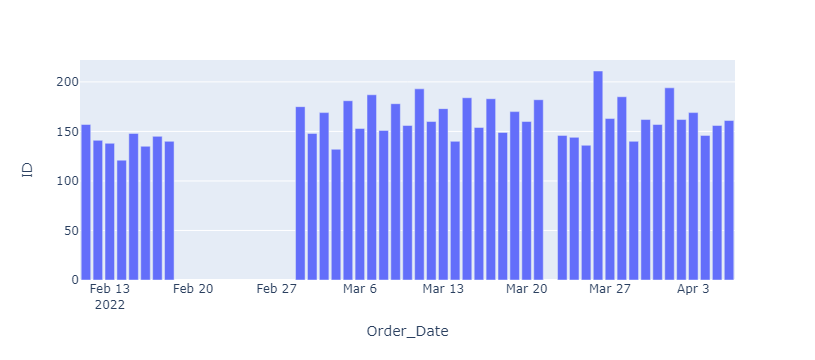

In [69]:
df['Order_Date'] = pd.to_datetime( df['Order_Date'], format='%d-%m-%Y' )
df_aux = df[['ID', 'Order_Date']].groupby('Order_Date').count().reset_index()

px.bar(df_aux, x='Order_Date', y='ID')

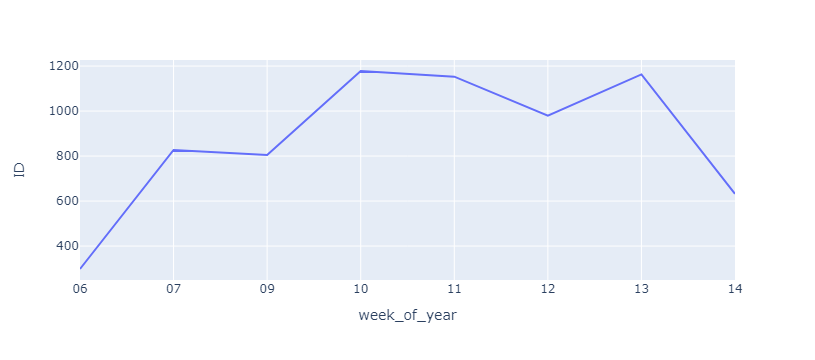

In [70]:
df['week_of_year'] = df['Order_Date'].dt.strftime('%U')
df_aux = df[['ID', 'week_of_year']].groupby('week_of_year').count().reset_index()

px.line(df_aux, x='week_of_year', y='ID')

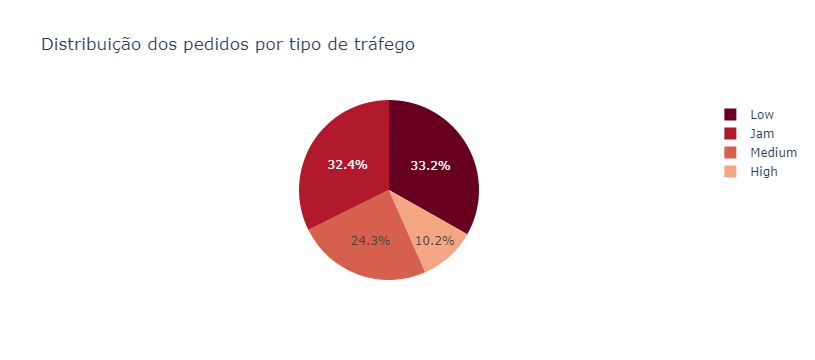

In [38]:
df_aux = df[['ID', 'Road_traffic_density']].groupby('Road_traffic_density').count().reset_index()
px.pie(df_aux, values='ID', names='Road_traffic_density', title='Distribuição dos pedidos por tipo de tráfego', color_discrete_sequence=px.colors.sequential.RdBu)

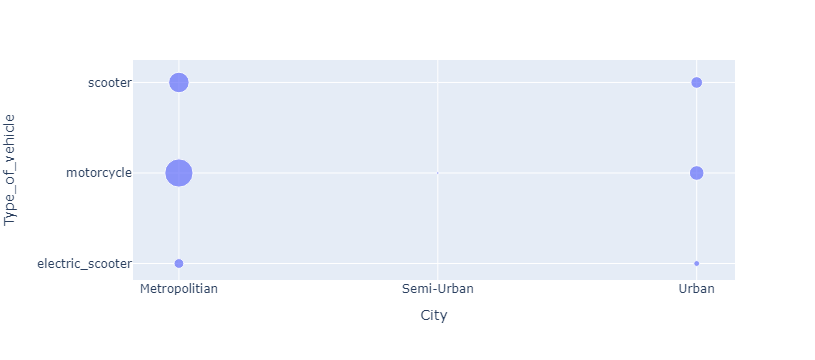

In [39]:
df_aux = df[['ID', 'City', 'Type_of_vehicle']].groupby(['City', 'Type_of_vehicle']).count().reset_index()
px.scatter(df_aux, x='City', y='Type_of_vehicle', size='ID')

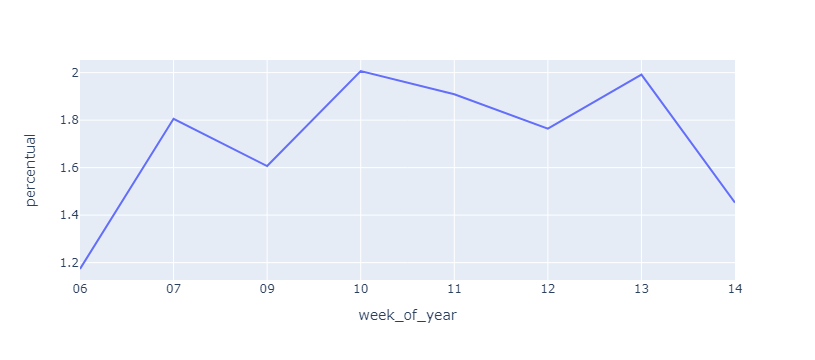

In [40]:
df_aux1 = df[['ID', 'week_of_year']].groupby('week_of_year').count().reset_index()
df_aux2 = df[['Delivery_person_ID', 'week_of_year']].groupby('week_of_year').nunique().reset_index()

df_aux = pd.merge(df_aux1, df_aux2, how = 'inner', on = 'week_of_year')
df_aux['percentual'] = df_aux['ID'] / df_aux['Delivery_person_ID']

px.line(df_aux, x='week_of_year', y='percentual')

In [41]:
df_aux = df[['City', 'Road_traffic_density', 'Restaurant_latitude', 'Restaurant_longitude']].groupby(['City', 'Road_traffic_density']).median().reset_index()

#Create the Map
map = folium.Map()

#You Markler the point in Map
for indice, row in df_aux.iterrows():
    folium.Marker(
        location=[row["Restaurant_latitude"], row["Restaurant_longitude"]],
        popup=row[['Road_traffic_density', 'City']],
    ).add_to(map)
map

1. Desenhar um gráfico de pizza com a média de idade dos entregadores
por cidade

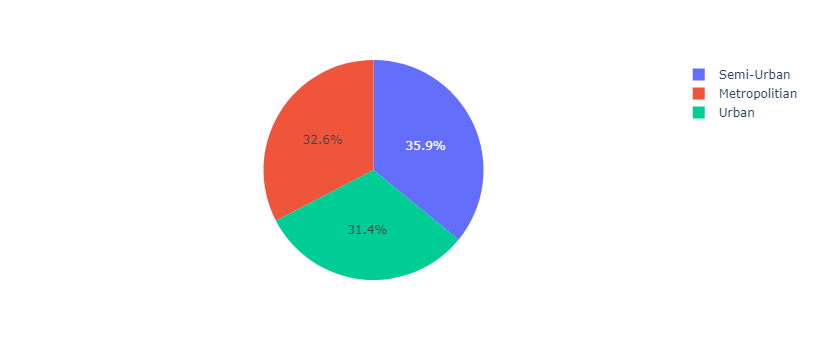

In [42]:
df_aux = df[['Delivery_person_Age', 'City']].groupby('City').mean().reset_index()

px.pie(df_aux, values='Delivery_person_Age', names='City')

2. Desenhe um gráfico de linha, mostrando o número total de entregas
diárias feitas por densidade de tráfego igual a “Low” e “Jam”

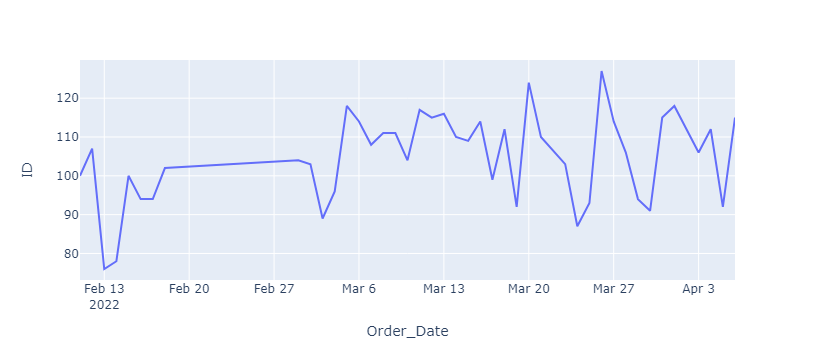

In [43]:
df_aux1 = df[(df['Road_traffic_density'] == 'Low') | (df['Road_traffic_density'] == 'Jam')]
df_aux2 = df_aux1[['ID', 'Order_Date']].groupby('Order_Date').count().reset_index()

px.line(df_aux2, x='Order_Date', y='ID')

3. Desenhe um gráfico de barras, mostrando as avaliações médias das
entregas por semana.

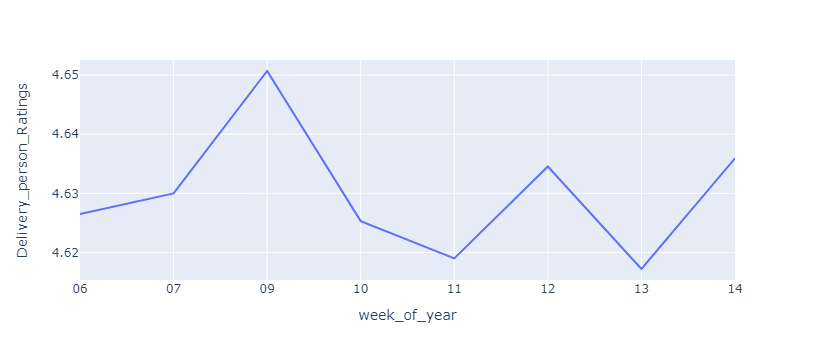

In [44]:
df_aux = df[['Delivery_person_Ratings', 'week_of_year']].groupby('week_of_year').mean().reset_index()

px.line(df_aux, x='week_of_year', y='Delivery_person_Ratings')

In [45]:
cols = ['City', 'Time_taken(min)']
df_aux = df.loc[:, ['City', 'Time_taken(min)']].groupby( 'City' ).agg({ 'Time_taken(min)' : ['mean', 'std']})

In [46]:
df_aux.columns = ['avg_time', 'std_time']

In [47]:
df_aux

,avg_time,std_time
City,,
Metropolitian,27.673925,9.154702
Semi-Urban,49.851852,2.741472
Urban,22.985525,8.950559


In [51]:
 df_aux = ( df.loc[:, ['City', 'Time_taken(min)', 'Road_traffic_density']]
                           .groupby( ['City', 'Road_traffic_density'] )
                           .agg( {'Time_taken(min)': ['mean', 'std']} ) )

In [53]:
df_aux.columns = ['avg_time', 'std_time']

In [55]:
df_aux = df_aux.reset_index()

In [56]:
df_aux

,City,Road_traffic_density,avg_time,std_time
0,Metropolitian,High,28.267025,8.035292
1,Metropolitian,Jam,31.920776,9.526357
2,Metropolitian,Low,22.651738,7.014438
3,Metropolitian,Medium,28.061074,8.372404
4,Semi-Urban,High,49.333333,3.511885
5,Semi-Urban,Jam,50.238095,2.718543
6,Semi-Urban,Medium,47.666667,1.527525
7,Urban,High,23.717949,8.484365
8,Urban,Jam,27.808889,10.380464
9,Urban,Low,19.439750,6.304130


In [63]:
fig = px.sunburst(
    df_aux, path=['City', 'Road_traffic_density'],
    values='avg_time',
    color='std_time',
    color_continuous_scale='RdBu', 
    color_continuous_midpoint=np.average(df_aux['std_time'] ) )

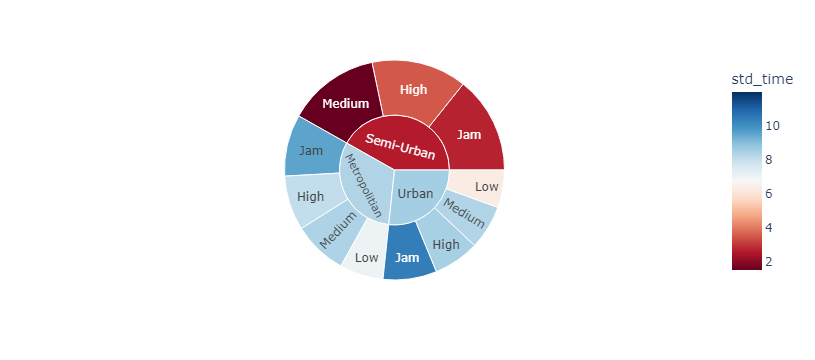

In [64]:
fig.show()

In [72]:
df['Order_Date'].min()

Timestamp('2022-02-11 00:00:00')

In [73]:
df['Order_Date'].max()

Timestamp('2022-04-06 00:00:00')

In [74]:
df['Order_Date'].mean()

Timestamp('2022-03-13 16:42:22.260127744')

In [75]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),week_of_year
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,...,conditions Sunny,High,2.0,Snack,motorcycle,0,No,Urban,24,11
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,...,conditions Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,33,12
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,...,conditions Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,26,11
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,...,conditions Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,21,14
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,...,conditions Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,0xb219,JAPRES02DEL03,29,4.5,26.914142,75.805704,26.974142,75.865704,2022-04-01,1900-01-01 20:30:00,...,conditions Sunny,Jam,0.0,Snack,motorcycle,1,No,Metropolitian,46,13
7749,0x8c17,HYDRES18DEL02,27,4.5,17.450851,78.379347,17.530851,78.459347,2022-03-14,1900-01-01 17:10:00,...,conditions Sandstorms,Medium,2.0,Snack,electric_scooter,1,No,Metropolitian,26,11
7750,0xccee,AGRRES010DEL01,21,4.7,27.163303,78.057044,27.273303,78.167044,2022-02-16,1900-01-01 22:55:00,...,conditions Cloudy,Low,0.0,Drinks,motorcycle,0,No,Metropolitian,22,07
7751,0x22d0,SURRES01DEL01,37,4.8,21.186438,72.794115,21.226438,72.834115,2022-03-11,1900-01-01 13:30:00,...,conditions Windy,High,0.0,Meal,motorcycle,1,No,Metropolitian,38,10


In [77]:
df['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium'], dtype=object)